# Package Installation 

In [1]:
# %pip install ucimlrepo
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install scipy
# %pip install joblib
# %pip install xgboost
# %pip install streamlit

# Import Library

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder
from scipy.stats import zscore
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import joblib

%matplotlib inline

# Loading Dataset

- read csv file path from uci repo
- open csv file with pandas, to use pandas function 

In [3]:
# get dataset from uci repo 
creditApproval = fetch_ucirepo(id=27) 

# metadata - get csv file
ca_csv = creditApproval.metadata.data_url
print(ca_csv) 

https://archive.ics.uci.edu/static/public/27/data.csv


## Reading Data into DataFrames

In [4]:
# open csv file with pandas dataframe 
ca_df = pd.read_csv(ca_csv)

ca_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


# Data Overview and Initial Inspection

## Data Shape ( Total Rows and Columns )

In [5]:
# get the number of row and column by pandas ( row, col )
ca_df.shape

(690, 16)

## Column Names 

In [6]:
# display all column name 
ca_df.columns.values

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16'], dtype=object)

#### Online resource explain

The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but **[this blog](https://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html)** gives us a pretty good overview of the probable features. The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.

## Head of the Dataset 

In [7]:
# get first few row data 
ca_df.head(20)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


## Tail of the Dataset 

In [8]:
# get last few row data 
ca_df.tail(20)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,465.0,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,0.0,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,240.0,117,-
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,256.0,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,260.0,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,240.0,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,129.0,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,100.0,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,0.0,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,0.0,0,-


## Data Types

In [9]:
# check each col datatype 
ca_df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

## Basic Structure Overview 

In [10]:
# get the summary by dataframes structure 
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


#### NOTE 
- ALL the datatype is correct and same with what we display justnow 
- 4 is in float, 2 in integer and 10 in object 

## Summary Statistics 

In [11]:
# view Categorical data columns statistics result
ca_df.describe(include='object')

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [12]:
# view continuous data columns statistics result including min, max, mean and count 
ca_df.describe(exclude='object')

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


##### NOTE:
- freq is the most common value’s frequency

## Check for Duplicate Rows

In [13]:
# get duplicated row 
print("Duplicated rows > ", ca_df.duplicated().sum())

Duplicated rows >  0


- no duplicated data exist

## Count of Unique Values per Column

In [14]:
# to understand each Categorical data column have what unique data 
for col in ca_df.select_dtypes('object').columns :
    print("Column Name > ", col)
    unique = ca_df[col].unique()
    print("No of Unique Data > ", len(unique))
    print("Unique Data Exist > ", unique)
    print("\n")

Column Name >  A1
No of Unique Data >  3
Unique Data Exist >  ['b' 'a' nan]


Column Name >  A4
No of Unique Data >  4
Unique Data Exist >  ['u' 'y' nan 'l']


Column Name >  A5
No of Unique Data >  4
Unique Data Exist >  ['g' 'p' nan 'gg']


Column Name >  A6
No of Unique Data >  15
Unique Data Exist >  ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]


Column Name >  A7
No of Unique Data >  10
Unique Data Exist >  ['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']


Column Name >  A9
No of Unique Data >  2
Unique Data Exist >  ['t' 'f']


Column Name >  A10
No of Unique Data >  2
Unique Data Exist >  ['t' 'f']


Column Name >  A12
No of Unique Data >  2
Unique Data Exist >  ['f' 't']


Column Name >  A13
No of Unique Data >  3
Unique Data Exist >  ['g' 's' 'p']


Column Name >  A16
No of Unique Data >  2
Unique Data Exist >  ['+' '-']




In [15]:
ca_df['A13'].unique()

array(['g', 's', 'p'], dtype=object)

# Identify Missing Values

In [16]:
ca_df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

#### NOTE 
- total 16 column and 7 column have missing value
  - A1, 2, 4, 5, 6, 7, 14 ( MISSING VALUE )

## Visualize Missingness 

In [17]:
# ca_df['A1'].dtype
ca_df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

**[ How to change color for sns boxplot ](https://www.statology.org/seaborn-barplot-color/)**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11068\2451907036.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missingData.index, y=missingData.values, palette=mdColor)


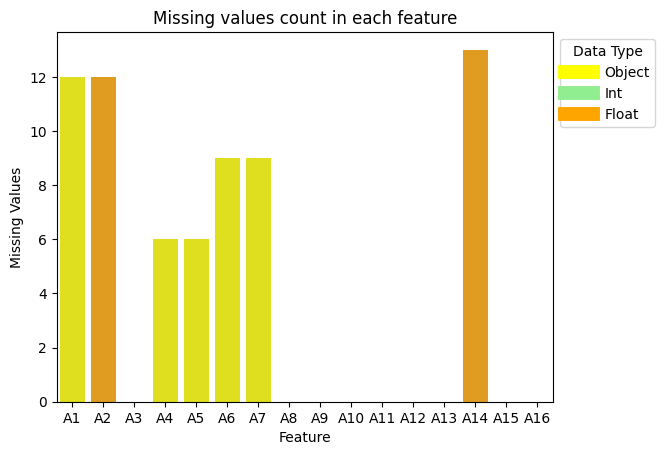

NULL Object >  42
NULL Int >  0
NULL Float >  25


In [18]:
missingData = ca_df.isna().sum()

continuous = ca_df.select_dtypes(exclude='object')
categorical = ca_df.select_dtypes(include='object')

mdColor = ['yellow' if ca_df[x].dtype == 'O' else 'lightgreen' if ca_df[x].dtype == 'int64' else 'orange' for x in missingData.index]

# plot graph
sns.barplot(x=missingData.index, y=missingData.values, palette=mdColor)
# sns.barplot(x=missingData.index, y=missingData.values, palette=mdColor, hue=ca_df.dtypes)

legend_handles = [plt.Line2D([0], [0], color='yellow', lw=10, label='Object'),
                  plt.Line2D([0], [0], color='lightgreen', lw=10, label='Int'),
                  plt.Line2D([0], [0], color='orange', lw=10, label='Float')]

plt.legend(title="Data Type", bbox_to_anchor=(1, 1), handles=legend_handles)
plt.title('Missing values count in each feature')
plt.xlabel('Feature')
plt.ylabel('Missing Values')

plt.show()

# Conclusion
print("NULL Object > ", ca_df.select_dtypes('object').isna().sum().sum())
print("NULL Int > ", ca_df.select_dtypes('int').isna().sum().sum())
print("NULL Float > ", ca_df.select_dtypes('float').isna().sum().sum())

# Data Visualization

## Data Distribution

### Pie Chart ( Categorical Data )

- categorical data
  - how many category
  - each category how many percentage

In [19]:
# show out all column with categorical data 
ca_df.describe(include='object')

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [20]:
colorMap = [
            '#7695FF',
            '#9DBDFF',
            '#FF9874', 
            '#FFD7C4',
            '#F6E96B', 
            '#BEDC74',
            '#A2CA71',
            '#FF8C9E',
            '#FF8225', 
            '#EF5A6F', 
            '#6C946F',
            '#E68369',
            '#DCA47C', 
            '#36BA98'
            ]

def colorShuffle():
    random.shuffle(colorMap)

len(colorMap)

14

In [21]:
# function for control the auto percentage format 
def autopct_format(percentage, values):
    # sum the category a and b together and get total 
    total = sum(values)

    # convert percentage back to number 
    val = int(round(percentage*total/100.0))
    
    return f'{percentage:.2f}%  ({val:d})' # .2%, two decimal point, the other 2 % is the format 

def plotPieChart(col, figsize):
    # get the category exist in the col and distribute of the data 
    dis = ca_df[col].value_counts()
    
    colorShuffle()

    plt.figure(figsize=figsize) 
    plt.pie(dis, labels=dis.index, autopct=lambda percentage: autopct_format(percentage, dis), colors=colorMap) 
    plt.title(f"Distribution of Category Data {col}")
    plt.legend(title=f"Category of {col}")
    plt.show() 

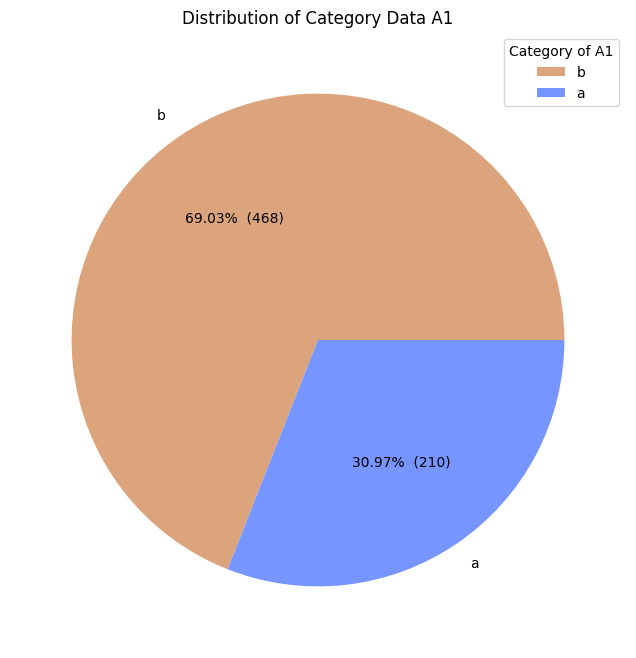

In [22]:
# create a pie chart 
plotPieChart('A1', (10,8))

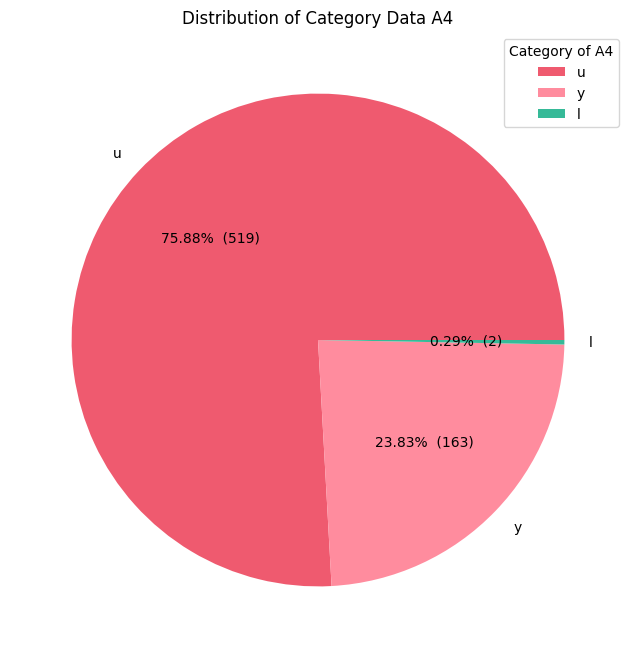

In [23]:
# create a pie chart 
plotPieChart('A4', (10,8))

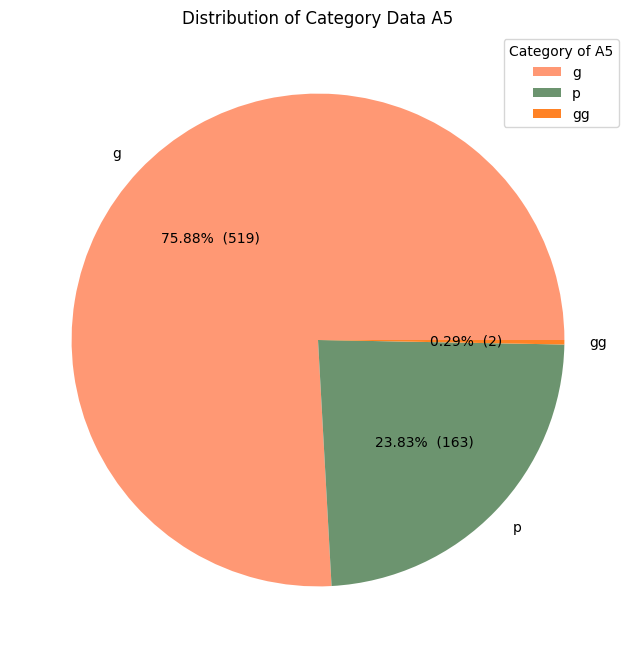

In [24]:
# create a pie chart 
plotPieChart('A5', (10,8))

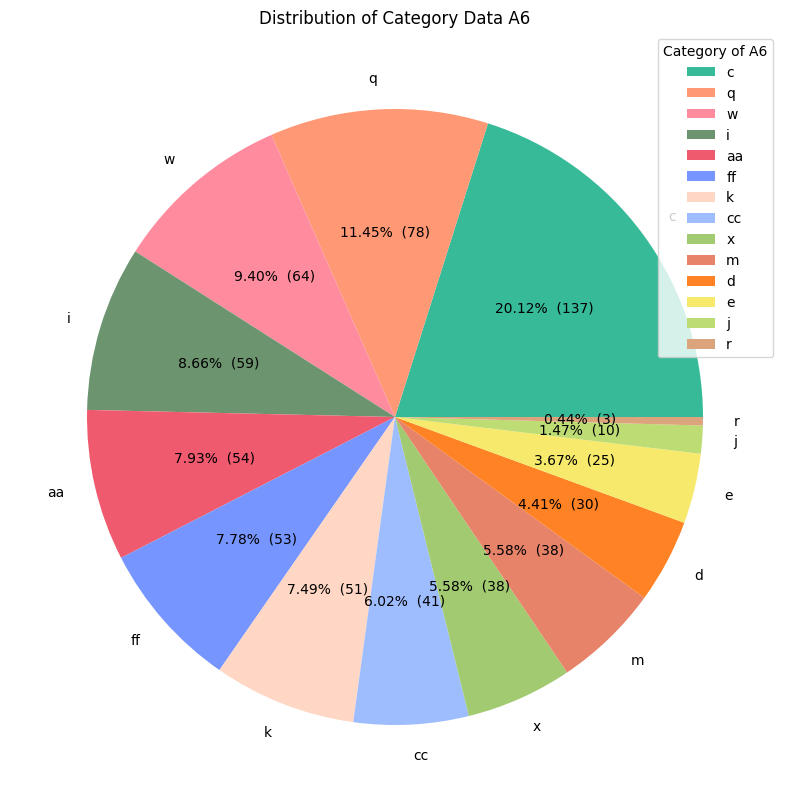

In [25]:
# create a pie chart 
plotPieChart('A6', (11,10))

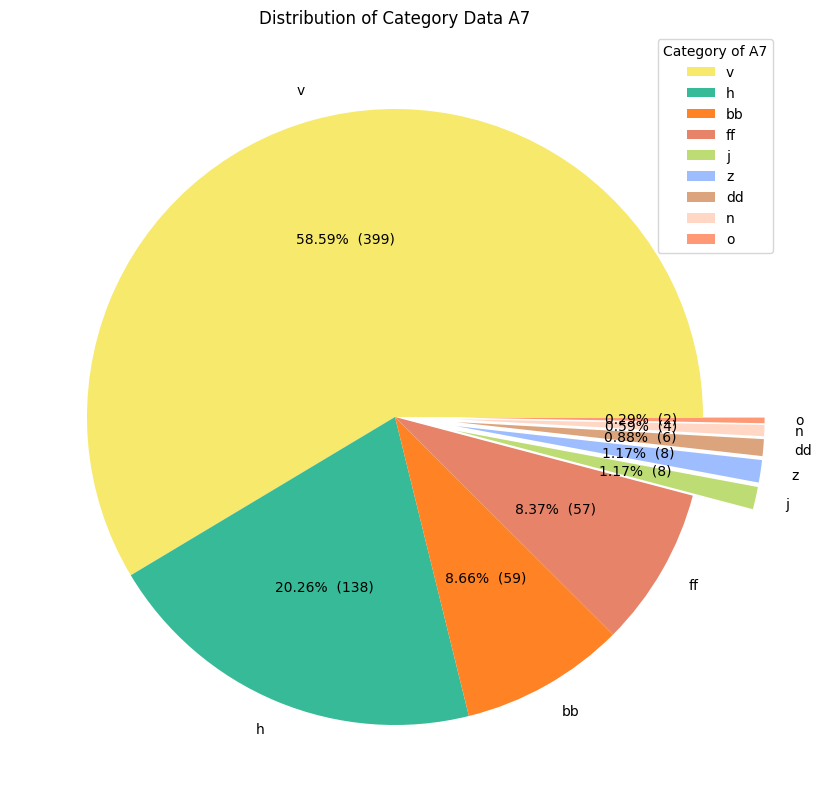

In [26]:
# get the category exist in the col A7 and distribute of the data 
aseven_dis = ca_df['A7'].value_counts()

colorShuffle()

# set explode value
# explode the small distribution category so can clearly visualize it 
explode = (0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2)

# create a pie chart 
plt.figure(figsize=(11,10)) 
plt.pie(aseven_dis, labels=aseven_dis.index, autopct=lambda percentage: autopct_format(percentage, aseven_dis), colors=colorMap, explode=explode) 
plt.title("Distribution of Category Data A7")
plt.legend(title="Category of A7")
plt.show() 

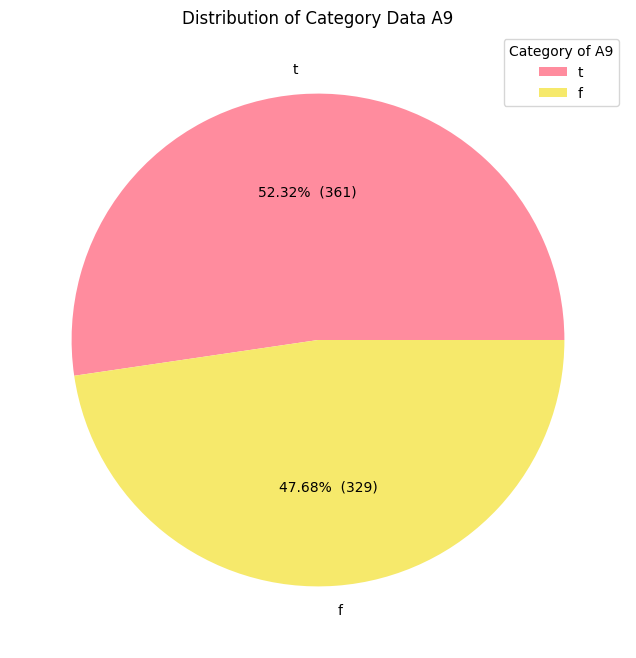

In [27]:
# create a pie chart 
plotPieChart('A9', (10,8))

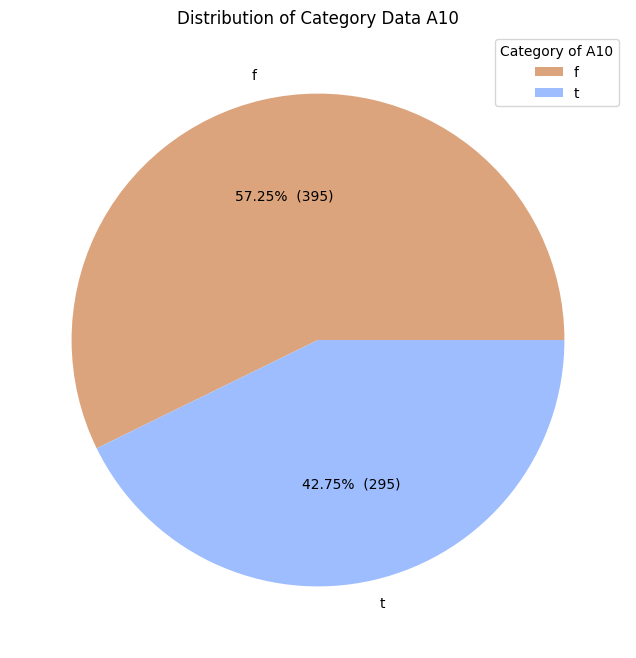

In [28]:
# create a pie chart 
plotPieChart('A10', (10,8))

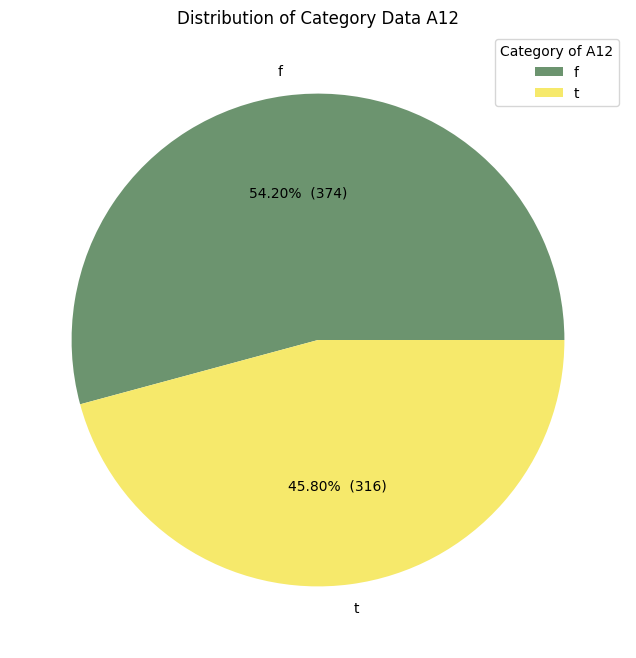

In [29]:
# create a pie chart 
plotPieChart('A12', (10,8))

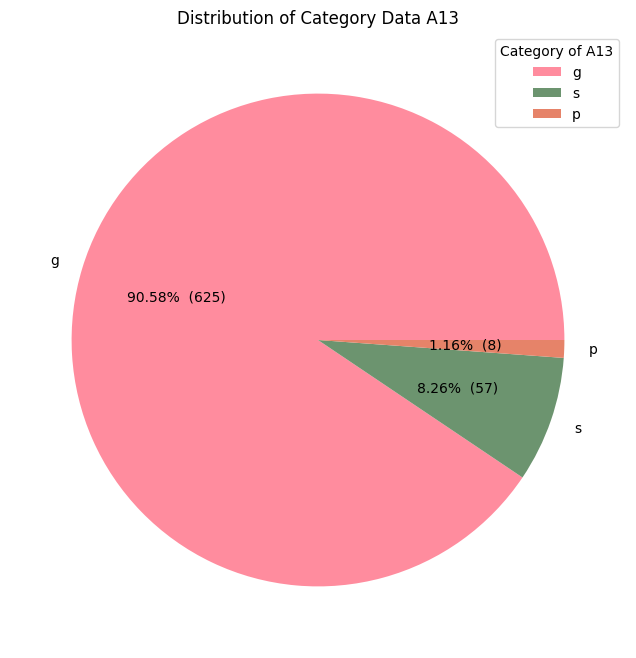

In [30]:
# create a pie chart 
plotPieChart('A13', (10,8))

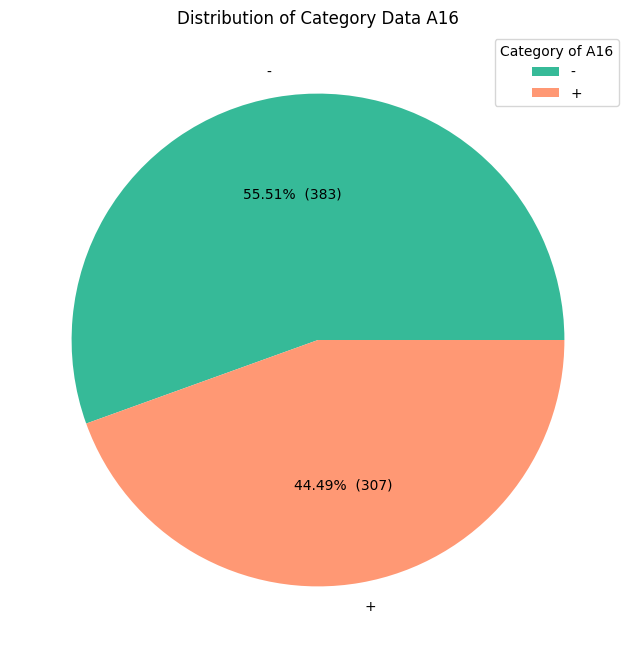

In [31]:
# create a pie chart 
plotPieChart('A16', (10,8))

### Heatmap ( Categorical Data )
- A9, 10, 12

> due to **A1 have missing value**, so here only show 678 data <br>
> if want to change can using A16 to change 

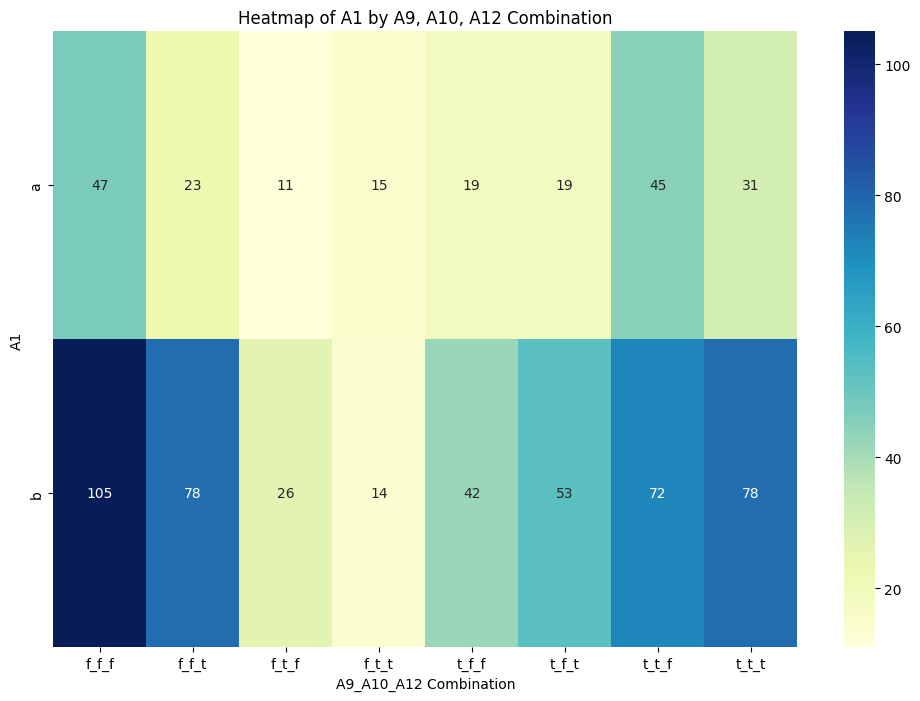

In [32]:
cpy_df = ca_df.copy()

# Combine A9 and A10 and A11 to create a unique key
cpy_df['A9_A10_A12'] = cpy_df['A9'].astype(str) + "_" + cpy_df['A10'].astype(str) + "_" + cpy_df['A12'].astype(str)

# Create a pivot table with A1 as values and A9_A10 as columns
pivot_table = cpy_df.pivot_table(index='A1', columns='A9_A10_A12', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Heatmap of A1 by A9, A10, A12 Combination")
plt.xlabel("A9_A10_A12 Combination")
plt.ylabel("A1")
plt.show()

### Histogram with Box Plot ( Continuous data )
- To show both the distribution (via histogram) and summary statistics (via box plot) together for a comprehensive view
- Histogram ( shape of distribution )
- Box Plot ( outlier and spread )

In [33]:
# get all columns with continuous data 
ca_df.describe(exclude=["object"])

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [34]:
sns.set_theme(style="darkgrid")

def plotHistBP(col) :
    x = ca_df[col]

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # box plot 
    sns.boxplot(x=x, ax=ax_box, color='lightblue')
    
    # histogram 
    sns.histplot(x=x, bins=20, kde=True, ax=ax_hist, color='blue', edgecolor='black')
    
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    
    plt.title(f"Distribution of Continuous data {col}")
    
    plt.show()

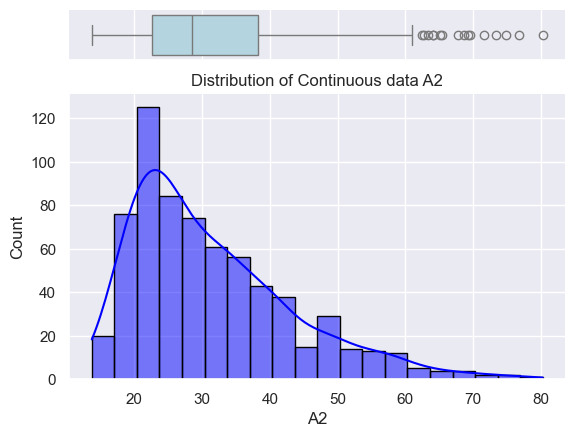

In [35]:
# create histogram with box plot graph
plotHistBP('A2')

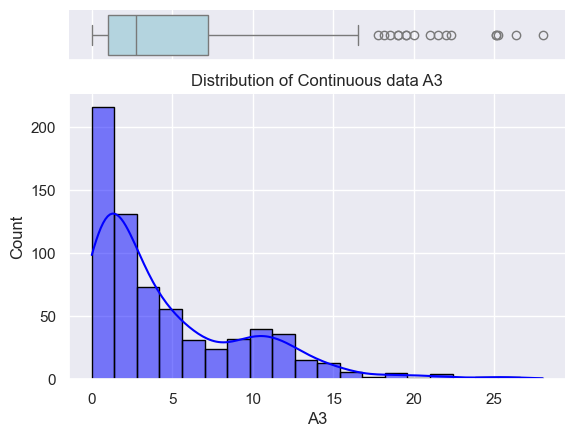

In [36]:
# create histogram with box plot graph
plotHistBP('A3')

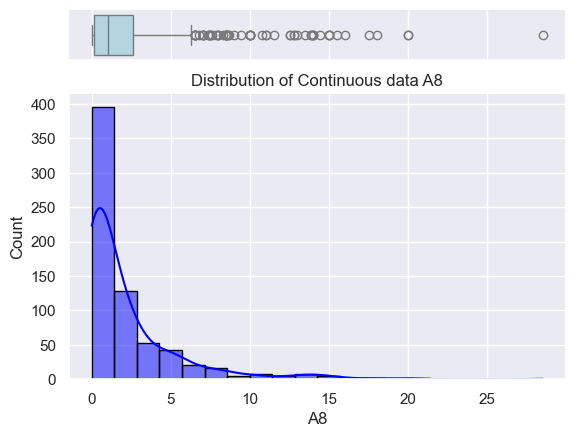

In [37]:
# create histogram with box plot graph
plotHistBP('A8')

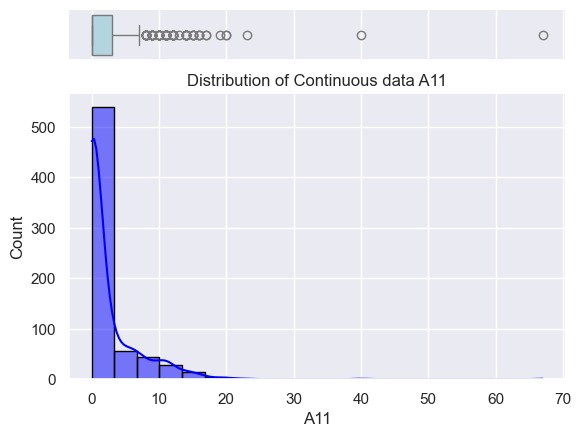

In [38]:
# create histogram with box plot graph
plotHistBP('A11')

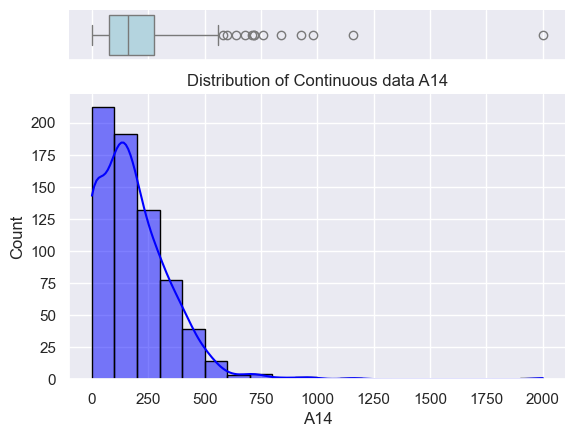

In [39]:
# create histogram with box plot graph
plotHistBP('A14')

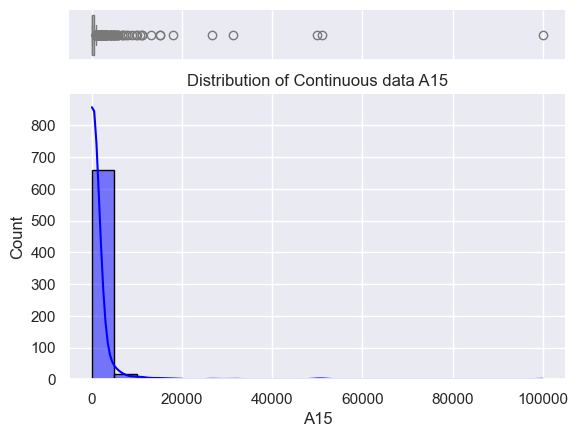

In [40]:
# create histogram with box plot graph
plotHistBP('A15')

## Bivariate Analysis 

### Box Plots for Continuous vs Categorical Variables

In [41]:
def plotBoxPlot(y) :
    plt.figure(figsize=(8, 6))

    # Box plot
    sns.boxplot(x='A16', y=y, data=ca_df)

    # Overlay strip plot for individual data points
    sns.stripplot(x='A16', y=y, data=ca_df, color='red', jitter=True, size=3, alpha=1)
    # alpha = opacity  
    plt.title(f'Box Plot of {y} VS A16 with Data Points')
    plt.xlabel('A16 (Credit Approval: 0 = Yes, 1 = No)')
    plt.ylabel(f'{y} (Continuous Feature)')
    plt.show()

- y = A2 ( continuous )
- x = A16 ( categorical ) ( target ) 

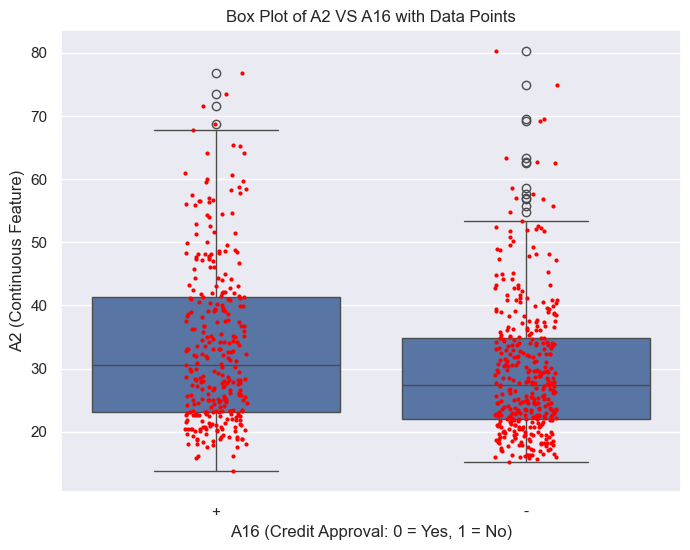

In [42]:
plotBoxPlot('A2')

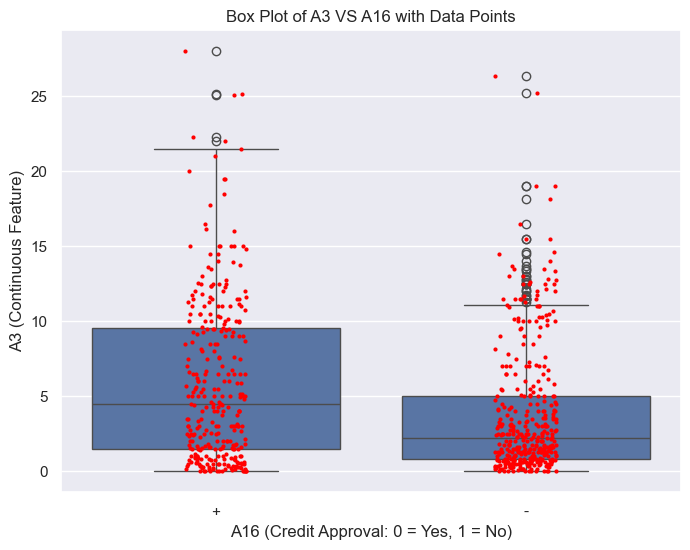

In [43]:
plotBoxPlot('A3')

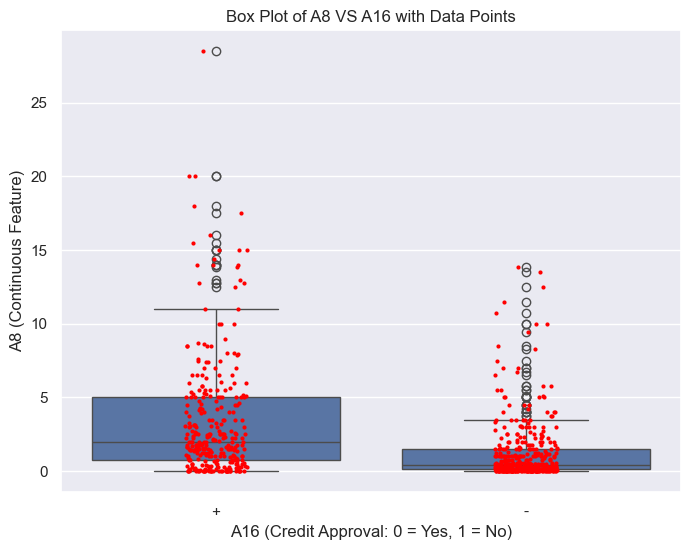

In [44]:
plotBoxPlot('A8')

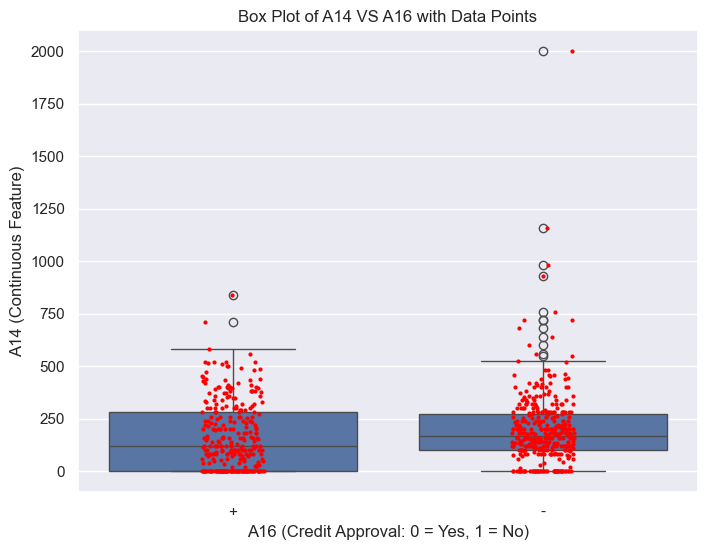

In [45]:
plotBoxPlot('A14')

### Bar Plot For Categorical vs Categorical

In [46]:
def plotBarPlot(y, figsize) :
    colorShuffle()

    color = colorMap.copy()
    
    # set x-axis and hue order
    x = ca_df['A16'].value_counts().sort_index().index
    hue = ca_df[y].value_counts().sort_index().index
    
    # create graph
    plt.figure(figsize=figsize) 
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(data=ca_df, x="A16", hue=y, order=x, hue_order=hue, palette=[color.pop(int(random.random() * len(color))) for x in range(len(hue))])
    ax.legend(title=f"Category of {y}")
    plt.title(f'Box Plot of {y} VS A16 with Data Points')
    plt.xlabel('A16 (Credit Approval: 0 = Yes, 1 = No)')
    plt.ylabel(f'Number of {y} (Categorical Feature)')
    
    # Add the exact number of instances on each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')
    
    plt.show()

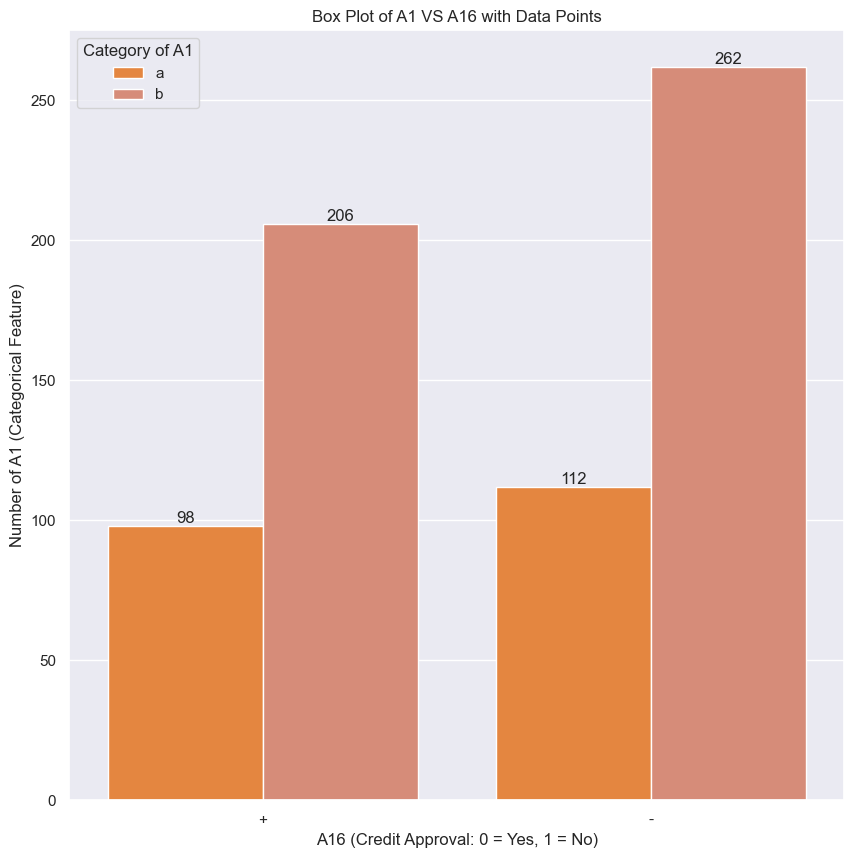

In [47]:
plotBarPlot('A1', (10,10))

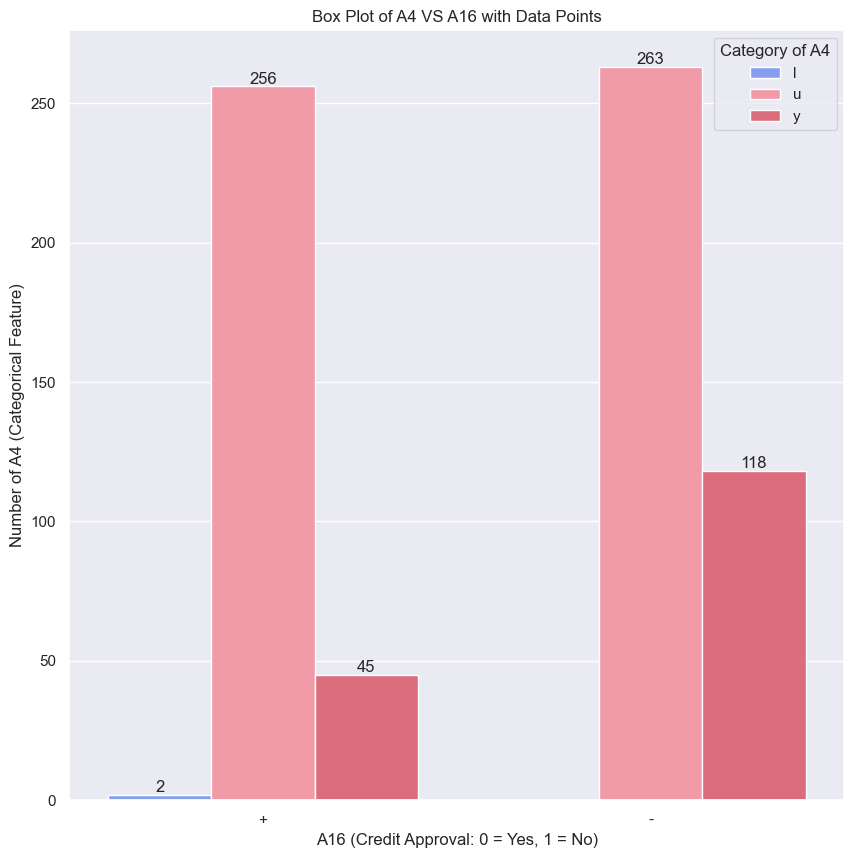

In [48]:
plotBarPlot('A4', (10,10))

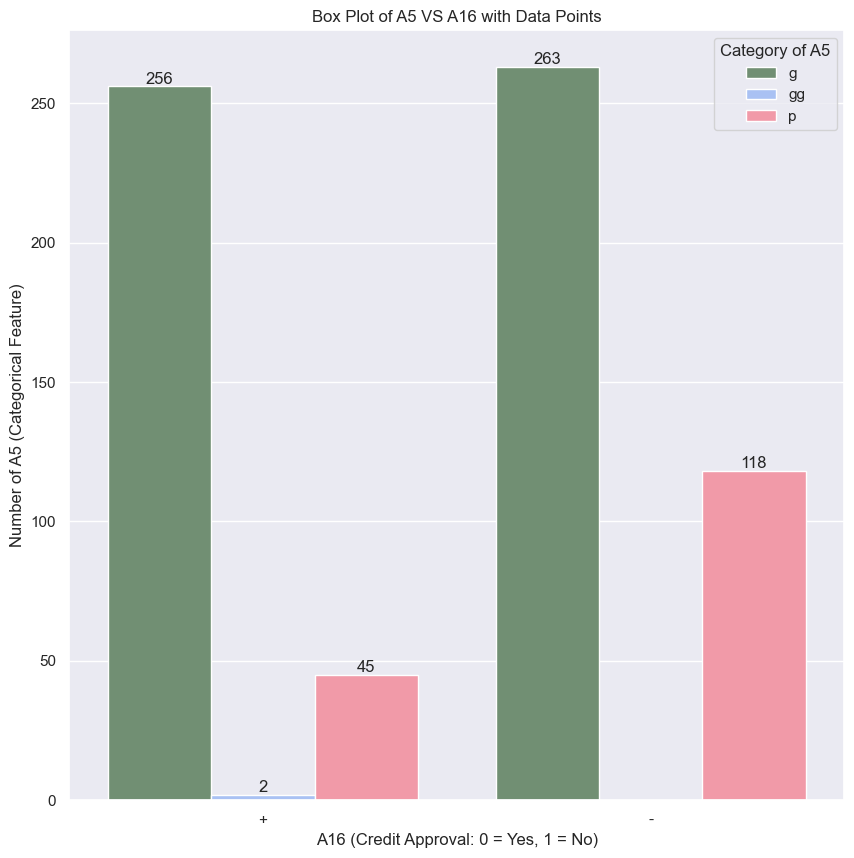

In [49]:
plotBarPlot('A5', (10,10))

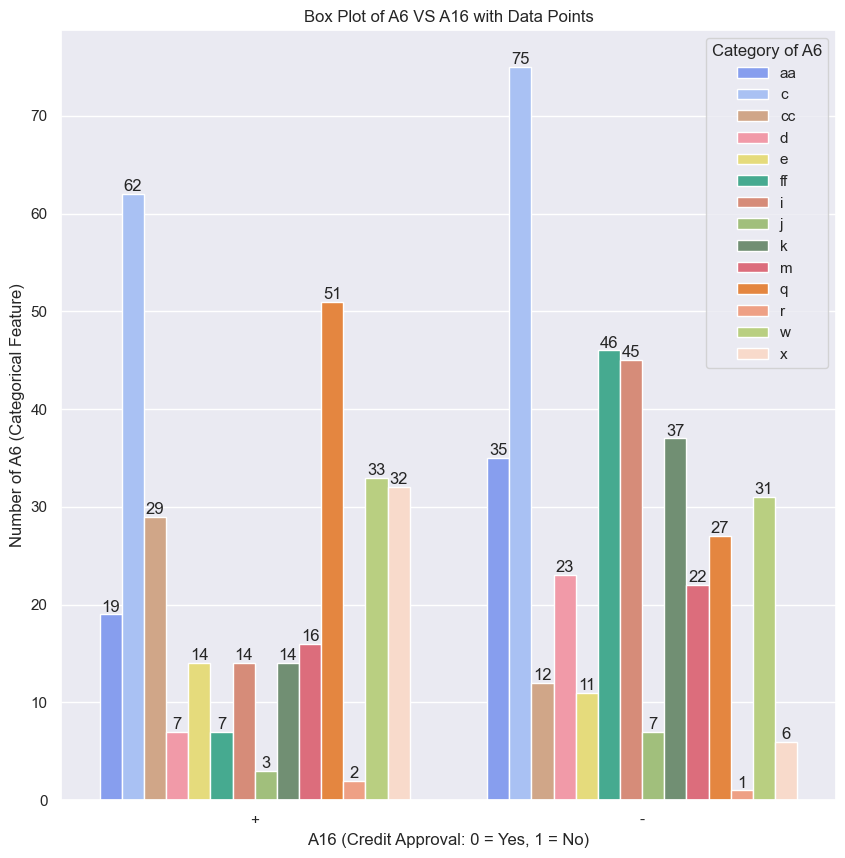

In [50]:
plotBarPlot('A6', (10,10))

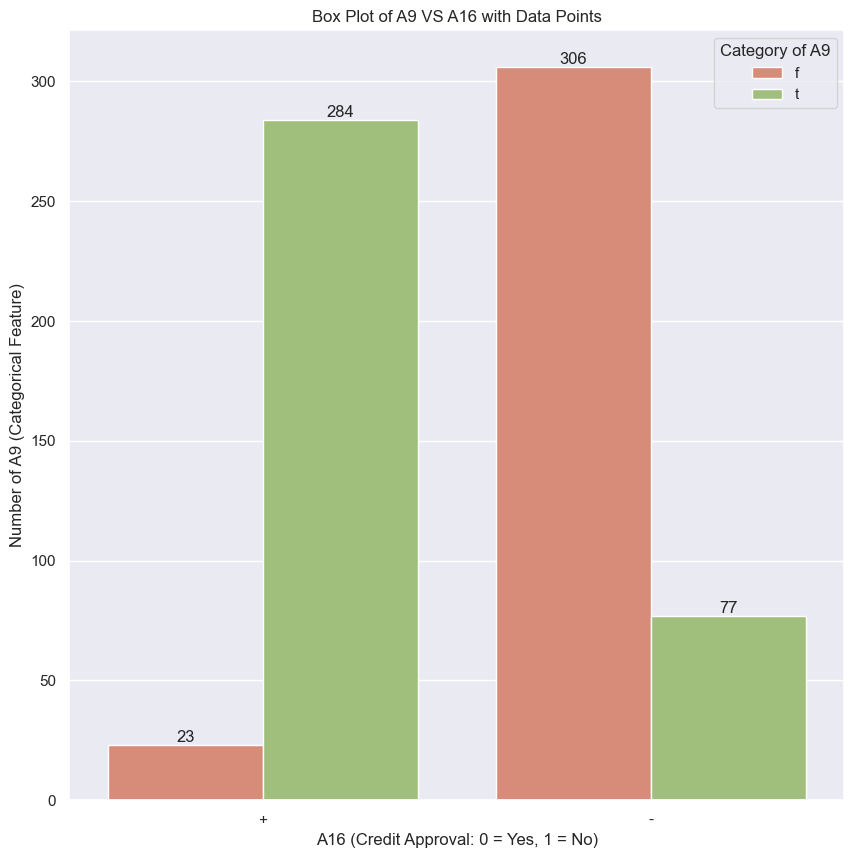

In [51]:
plotBarPlot('A9', (10,10))

------------------------------------------------------------------------
Data Preparation Start 

# Data Cleaning

## Handling Missing Value 

### Imputing Missing Continuous Variable

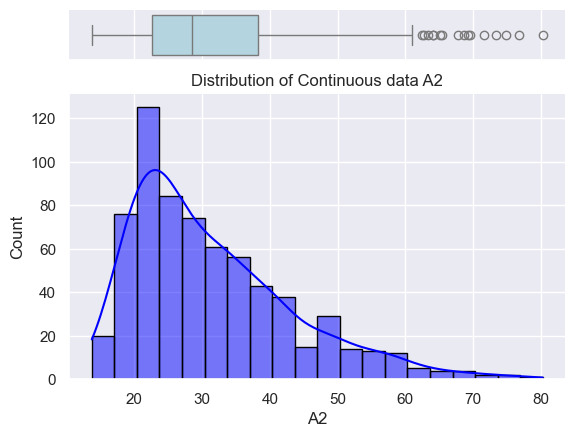

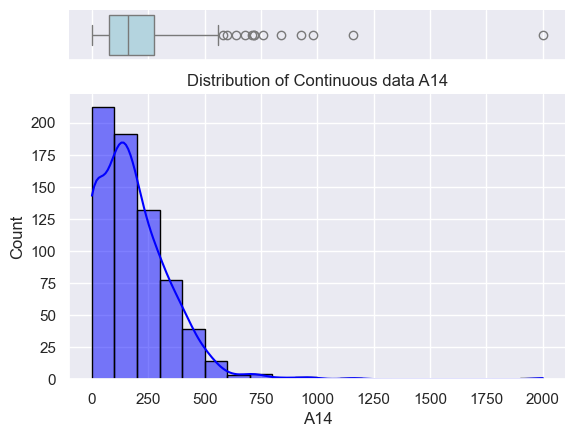

In [52]:
# view the distribution of A2 and A14 
plotHistBP('A2')
plotHistBP('A14')

- both A2 and A14 are right skewed so to prevent be affect by outlier, we are going to use MEDIAN

In [53]:
# prepare function for imputing process
def getNullRowByCol(col) : 
    # show all columns that input (eg A2) is NaN
    # get True False map
    return pd.isnull(ca_df[col])

def replaceByMedian(col) : 
    # get the median of col
    median = ca_df[col].median()

    ca_df[col] = ca_df[col].fillna(median)

def replaceByLOCF(col) : 
    # using Last Observation Carried Forward (LOCF) 
    ca_df[col] = ca_df[col].ffill()

#### A2

In [54]:
bo = getNullRowByCol('A2')
    
# only display True
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,300.0,0,-
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0,t,s,928.0,0,-
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,f,g,0.0,0,-
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,320.0,0,-
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,380.0,2010,-
286,a,NaN,1.500,u,g,ff,ff,0.000,f,t,2,t,g,200.0,105,-
329,b,NaN,4.000,y,p,i,v,0.085,f,f,0,t,g,411.0,0,-
445,a,NaN,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,-
450,b,NaN,3.000,y,p,i,bb,7.000,f,f,0,f,g,0.0,1,-
500,b,NaN,4.000,u,g,x,v,5.000,t,t,3,t,g,290.0,2279,+


In [55]:
# CALL function to replace
replaceByMedian('A2')

# take a look on the result after imputing 
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
83,a,28.46,3.500,u,g,d,v,3.000,t,f,0,t,g,300.0,0,-
86,b,28.46,0.375,u,g,d,v,0.875,t,f,0,t,s,928.0,0,-
92,b,28.46,5.000,y,p,aa,v,8.500,t,f,0,f,g,0.0,0,-
97,b,28.46,0.500,u,g,c,bb,0.835,t,f,0,t,s,320.0,0,-
254,b,28.46,0.625,u,g,k,v,0.250,f,f,0,f,g,380.0,2010,-
286,a,28.46,1.500,u,g,ff,ff,0.000,f,t,2,t,g,200.0,105,-
329,b,28.46,4.000,y,p,i,v,0.085,f,f,0,t,g,411.0,0,-
445,a,28.46,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,-
450,b,28.46,3.000,y,p,i,bb,7.000,f,f,0,f,g,0.0,1,-
500,b,28.46,4.000,u,g,x,v,5.000,t,t,3,t,g,290.0,2279,+


#### A14

In [56]:
bo = getNullRowByCol('A14')

# only display True
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,NaN,600,+
206,a,71.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,NaN,26726,+
270,b,37.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,+
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,NaN,0,-
330,b,20.42,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,-
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,NaN,18,-
445,a,28.46,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,-
456,b,34.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,-


In [57]:
# CALL function to replace
replaceByMedian('A14')

# take a look on the result after imputing 
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,160.0,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,160.0,600,+
206,a,71.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,160.0,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,160.0,26726,+
270,b,37.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,160.0,0,+
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,160.0,0,-
330,b,20.42,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,160.0,0,-
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,160.0,18,-
445,a,28.46,11.250,u,g,ff,ff,0.000,f,f,0,f,g,160.0,5200,-
456,b,34.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,160.0,0,-


### Imputing Missing Categorical Variable

#### A1

In [58]:
bo = getNullRowByCol('A1')

# only display true
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,73.0,444,+
327,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0,-
346,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372.0,122,-
374,NaN,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260.0,1004,-
453,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300.0,0,-
479,NaN,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,80.0,0,-
489,NaN,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,263.0,0,-
520,NaN,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,160.0,234,+
598,NaN,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,240.0,768,+
601,NaN,42.25,1.750,y,p,NaN,NaN,0.000,f,f,0,t,g,150.0,1,-


In [59]:
replaceByLOCF('A1')

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
248,a,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,73.0,444,+
327,b,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0,-
346,b,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372.0,122,-
374,b,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260.0,1004,-
453,b,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300.0,0,-
479,b,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,80.0,0,-
489,b,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,263.0,0,-
520,b,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,160.0,234,+
598,a,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,240.0,768,+
601,a,42.25,1.750,y,p,NaN,NaN,0.000,f,f,0,t,g,150.0,1,-


#### A4

In [60]:
bo = getNullRowByCol('A4')

# only display true
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
270,b,37.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
330,b,20.42,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
456,b,34.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
592,b,23.17,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
622,a,25.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+


In [61]:
replaceByLOCF('A4')

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
270,b,37.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
330,b,20.42,0.0,y,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
456,b,34.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
592,b,23.17,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
622,a,25.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+


#### A5

In [62]:
bo = getNullRowByCol('A5')

# only display true
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
270,b,37.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
330,b,20.42,0.0,y,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
456,b,34.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
592,b,23.17,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
622,a,25.58,0.0,u,NaN,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+


In [63]:
replaceByLOCF('A5')

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
270,b,37.58,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
330,b,20.42,0.0,y,p,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
456,b,34.58,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,160.0,0,-
592,b,23.17,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+
622,a,25.58,0.0,u,g,NaN,NaN,0.0,f,f,0,f,p,160.0,0,+


#### A6

In [64]:
bo = getNullRowByCol('A6')

# only display true
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,160.0,0,+
270,b,37.58,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,160.0,0,+
330,b,20.42,0.00,y,p,NaN,NaN,0.000,f,f,0,f,p,160.0,0,-
456,b,34.58,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,160.0,0,-
479,b,26.50,2.71,y,p,NaN,NaN,0.085,f,f,0,f,s,80.0,0,-
539,b,80.25,5.50,u,g,NaN,NaN,0.540,t,f,0,f,g,0.0,340,-
592,b,23.17,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,160.0,0,+
601,a,42.25,1.75,y,p,NaN,NaN,0.000,f,f,0,t,g,150.0,1,-
622,a,25.58,0.00,u,g,NaN,NaN,0.000,f,f,0,f,p,160.0,0,+


In [65]:
replaceByLOCF('A6')

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,u,g,q,NaN,0.000,f,f,0,f,p,160.0,0,+
270,b,37.58,0.00,u,g,q,NaN,0.000,f,f,0,f,p,160.0,0,+
330,b,20.42,0.00,y,p,i,NaN,0.000,f,f,0,f,p,160.0,0,-
456,b,34.58,0.00,u,g,w,NaN,0.000,f,f,0,f,p,160.0,0,-
479,b,26.50,2.71,y,p,i,NaN,0.085,f,f,0,f,s,80.0,0,-
539,b,80.25,5.50,u,g,w,NaN,0.540,t,f,0,f,g,0.0,340,-
592,b,23.17,0.00,u,g,c,NaN,0.000,f,f,0,f,p,160.0,0,+
601,a,42.25,1.75,y,p,k,NaN,0.000,f,f,0,t,g,150.0,1,-
622,a,25.58,0.00,u,g,c,NaN,0.000,f,f,0,f,p,160.0,0,+


#### A7

In [66]:
bo = getNullRowByCol('A7')

# only display true
ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,u,g,q,NaN,0.000,f,f,0,f,p,160.0,0,+
270,b,37.58,0.00,u,g,q,NaN,0.000,f,f,0,f,p,160.0,0,+
330,b,20.42,0.00,y,p,i,NaN,0.000,f,f,0,f,p,160.0,0,-
456,b,34.58,0.00,u,g,w,NaN,0.000,f,f,0,f,p,160.0,0,-
479,b,26.50,2.71,y,p,i,NaN,0.085,f,f,0,f,s,80.0,0,-
539,b,80.25,5.50,u,g,w,NaN,0.540,t,f,0,f,g,0.0,340,-
592,b,23.17,0.00,u,g,c,NaN,0.000,f,f,0,f,p,160.0,0,+
601,a,42.25,1.75,y,p,k,NaN,0.000,f,f,0,t,g,150.0,1,-
622,a,25.58,0.00,u,g,c,NaN,0.000,f,f,0,f,p,160.0,0,+


In [67]:
replaceByLOCF('A7')

ca_df[bo]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,u,g,q,h,0.000,f,f,0,f,p,160.0,0,+
270,b,37.58,0.00,u,g,q,n,0.000,f,f,0,f,p,160.0,0,+
330,b,20.42,0.00,y,p,i,v,0.000,f,f,0,f,p,160.0,0,-
456,b,34.58,0.00,u,g,w,v,0.000,f,f,0,f,p,160.0,0,-
479,b,26.50,2.71,y,p,i,v,0.085,f,f,0,f,s,80.0,0,-
539,b,80.25,5.50,u,g,w,bb,0.540,t,f,0,f,g,0.0,340,-
592,b,23.17,0.00,u,g,c,h,0.000,f,f,0,f,p,160.0,0,+
601,a,42.25,1.75,y,p,k,v,0.000,f,f,0,t,g,150.0,1,-
622,a,25.58,0.00,u,g,c,j,0.000,f,f,0,f,p,160.0,0,+


### Result after Handling Missing Value

In [68]:
print("NULL Object > ", ca_df.select_dtypes('object').isna().sum().sum())
print("NULL Int > ", ca_df.select_dtypes('int').isna().sum().sum())
print("NULL Float > ", ca_df.select_dtypes('float').isna().sum().sum())

NULL Object >  0
NULL Int >  0
NULL Float >  0


# Data Preprocessing

## Encode Categorical Data

In [69]:
# select all data type in object 
encodeList = ca_df.select_dtypes(include="object")

featureList = encodeList.drop(columns='A16')
targetList = encodeList['A16']

# encodeList

### Encoding Categorical Feature ( Ordinal Encoder )

In [70]:
# encode categorical data with using OrdinalEncoder
oencoder = OrdinalEncoder()

# Dictionary to store the mappings
mappings = {}

for col in featureList.columns:
    oencoder.fit(ca_df[[col]])
    ca_df[col] = oencoder.fit_transform(ca_df[[col]])

    # Store the mapping of original values to encoded values
    # enumerate = convert to a list that have index number 
    # code, category = index and orginalLabel
    mappings[col] = {category: code for code, category in enumerate(oencoder.categories_[0])}
        
ca_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,30.83,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,202.0,0,+
1,0.0,58.67,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,43.0,560,+
2,0.0,24.50,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,280.0,824,+
3,1.0,27.83,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,100.0,3,+
4,1.0,20.17,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,21.08,10.085,2.0,2.0,4.0,3.0,1.25,0.0,0.0,0,0.0,0.0,260.0,0,-
686,0.0,22.67,0.750,1.0,0.0,1.0,7.0,2.00,0.0,1.0,2,1.0,0.0,200.0,394,-
687,0.0,25.25,13.500,2.0,2.0,5.0,2.0,2.00,0.0,1.0,1,1.0,0.0,200.0,1,-
688,1.0,17.92,0.205,1.0,0.0,0.0,7.0,0.04,0.0,0.0,0,0.0,0.0,280.0,750,-


### Encoding Categorical Target ( Label Encoder )

In [71]:
targetList.name

'A16'

In [72]:
lencoder = LabelEncoder()

ca_df[targetList.name] = lencoder.fit_transform(targetList)

In [73]:
# show the updated result 
ca_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,30.83,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,202.0,0,0
1,0.0,58.67,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,43.0,560,0
2,0.0,24.50,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,280.0,824,0
3,1.0,27.83,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,100.0,3,0
4,1.0,20.17,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,21.08,10.085,2.0,2.0,4.0,3.0,1.25,0.0,0.0,0,0.0,0.0,260.0,0,1
686,0.0,22.67,0.750,1.0,0.0,1.0,7.0,2.00,0.0,1.0,2,1.0,0.0,200.0,394,1
687,0.0,25.25,13.500,2.0,2.0,5.0,2.0,2.00,0.0,1.0,1,1.0,0.0,200.0,1,1
688,1.0,17.92,0.205,1.0,0.0,0.0,7.0,0.04,0.0,0.0,0,0.0,0.0,280.0,750,1


### Label for Each Encode data

In [74]:
# Display the mappings 
# each value have been encode to what value 
for col, mapping in mappings.items():
    print(f"Column: {col}")
    for original, encoded in mapping.items():
        print(f"  {original} -> {encoded}")

Column: A1
  a -> 0
  b -> 1
Column: A4
  l -> 0
  u -> 1
  y -> 2
Column: A5
  g -> 0
  gg -> 1
  p -> 2
Column: A6
  aa -> 0
  c -> 1
  cc -> 2
  d -> 3
  e -> 4
  ff -> 5
  i -> 6
  j -> 7
  k -> 8
  m -> 9
  q -> 10
  r -> 11
  w -> 12
  x -> 13
Column: A7
  bb -> 0
  dd -> 1
  ff -> 2
  h -> 3
  j -> 4
  n -> 5
  o -> 6
  v -> 7
  z -> 8
Column: A9
  f -> 0
  t -> 1
Column: A10
  f -> 0
  t -> 1
Column: A12
  f -> 0
  t -> 1
Column: A13
  g -> 0
  p -> 1
  s -> 2


In [75]:
print(f"Column: A16")
for original, encoded in zip(lencoder.classes_, range(len(lencoder.classes_))):
    print(f"  {original} -> {encoded}")

Column: A16
  + -> 0
  - -> 1


### Export Encoder For Further Use

In [77]:
joblib.dump(oencoder, 'pklFolder/featureEncoder.pkl')

joblib.dump(lencoder, 'pklFolder/targetEncoder.pkl')

['pklFolder/targetEncoder.pkl']

## Data Discovery and Profiling

### Correlation Analysis with Pairplots

https://study.com/academy/lesson/scatter-plot-and-correlation-definition-example-analysis.html#:~:text=A%20scatterplot%20with%20no%20correlation,pattern%2C%20neither%20positive%20nor%20negative.&text=The%20scatterplot%20shows%20haphazard%20points%20that%20follow%20no%20direction. 

<Figure size 1000x1000 with 0 Axes>

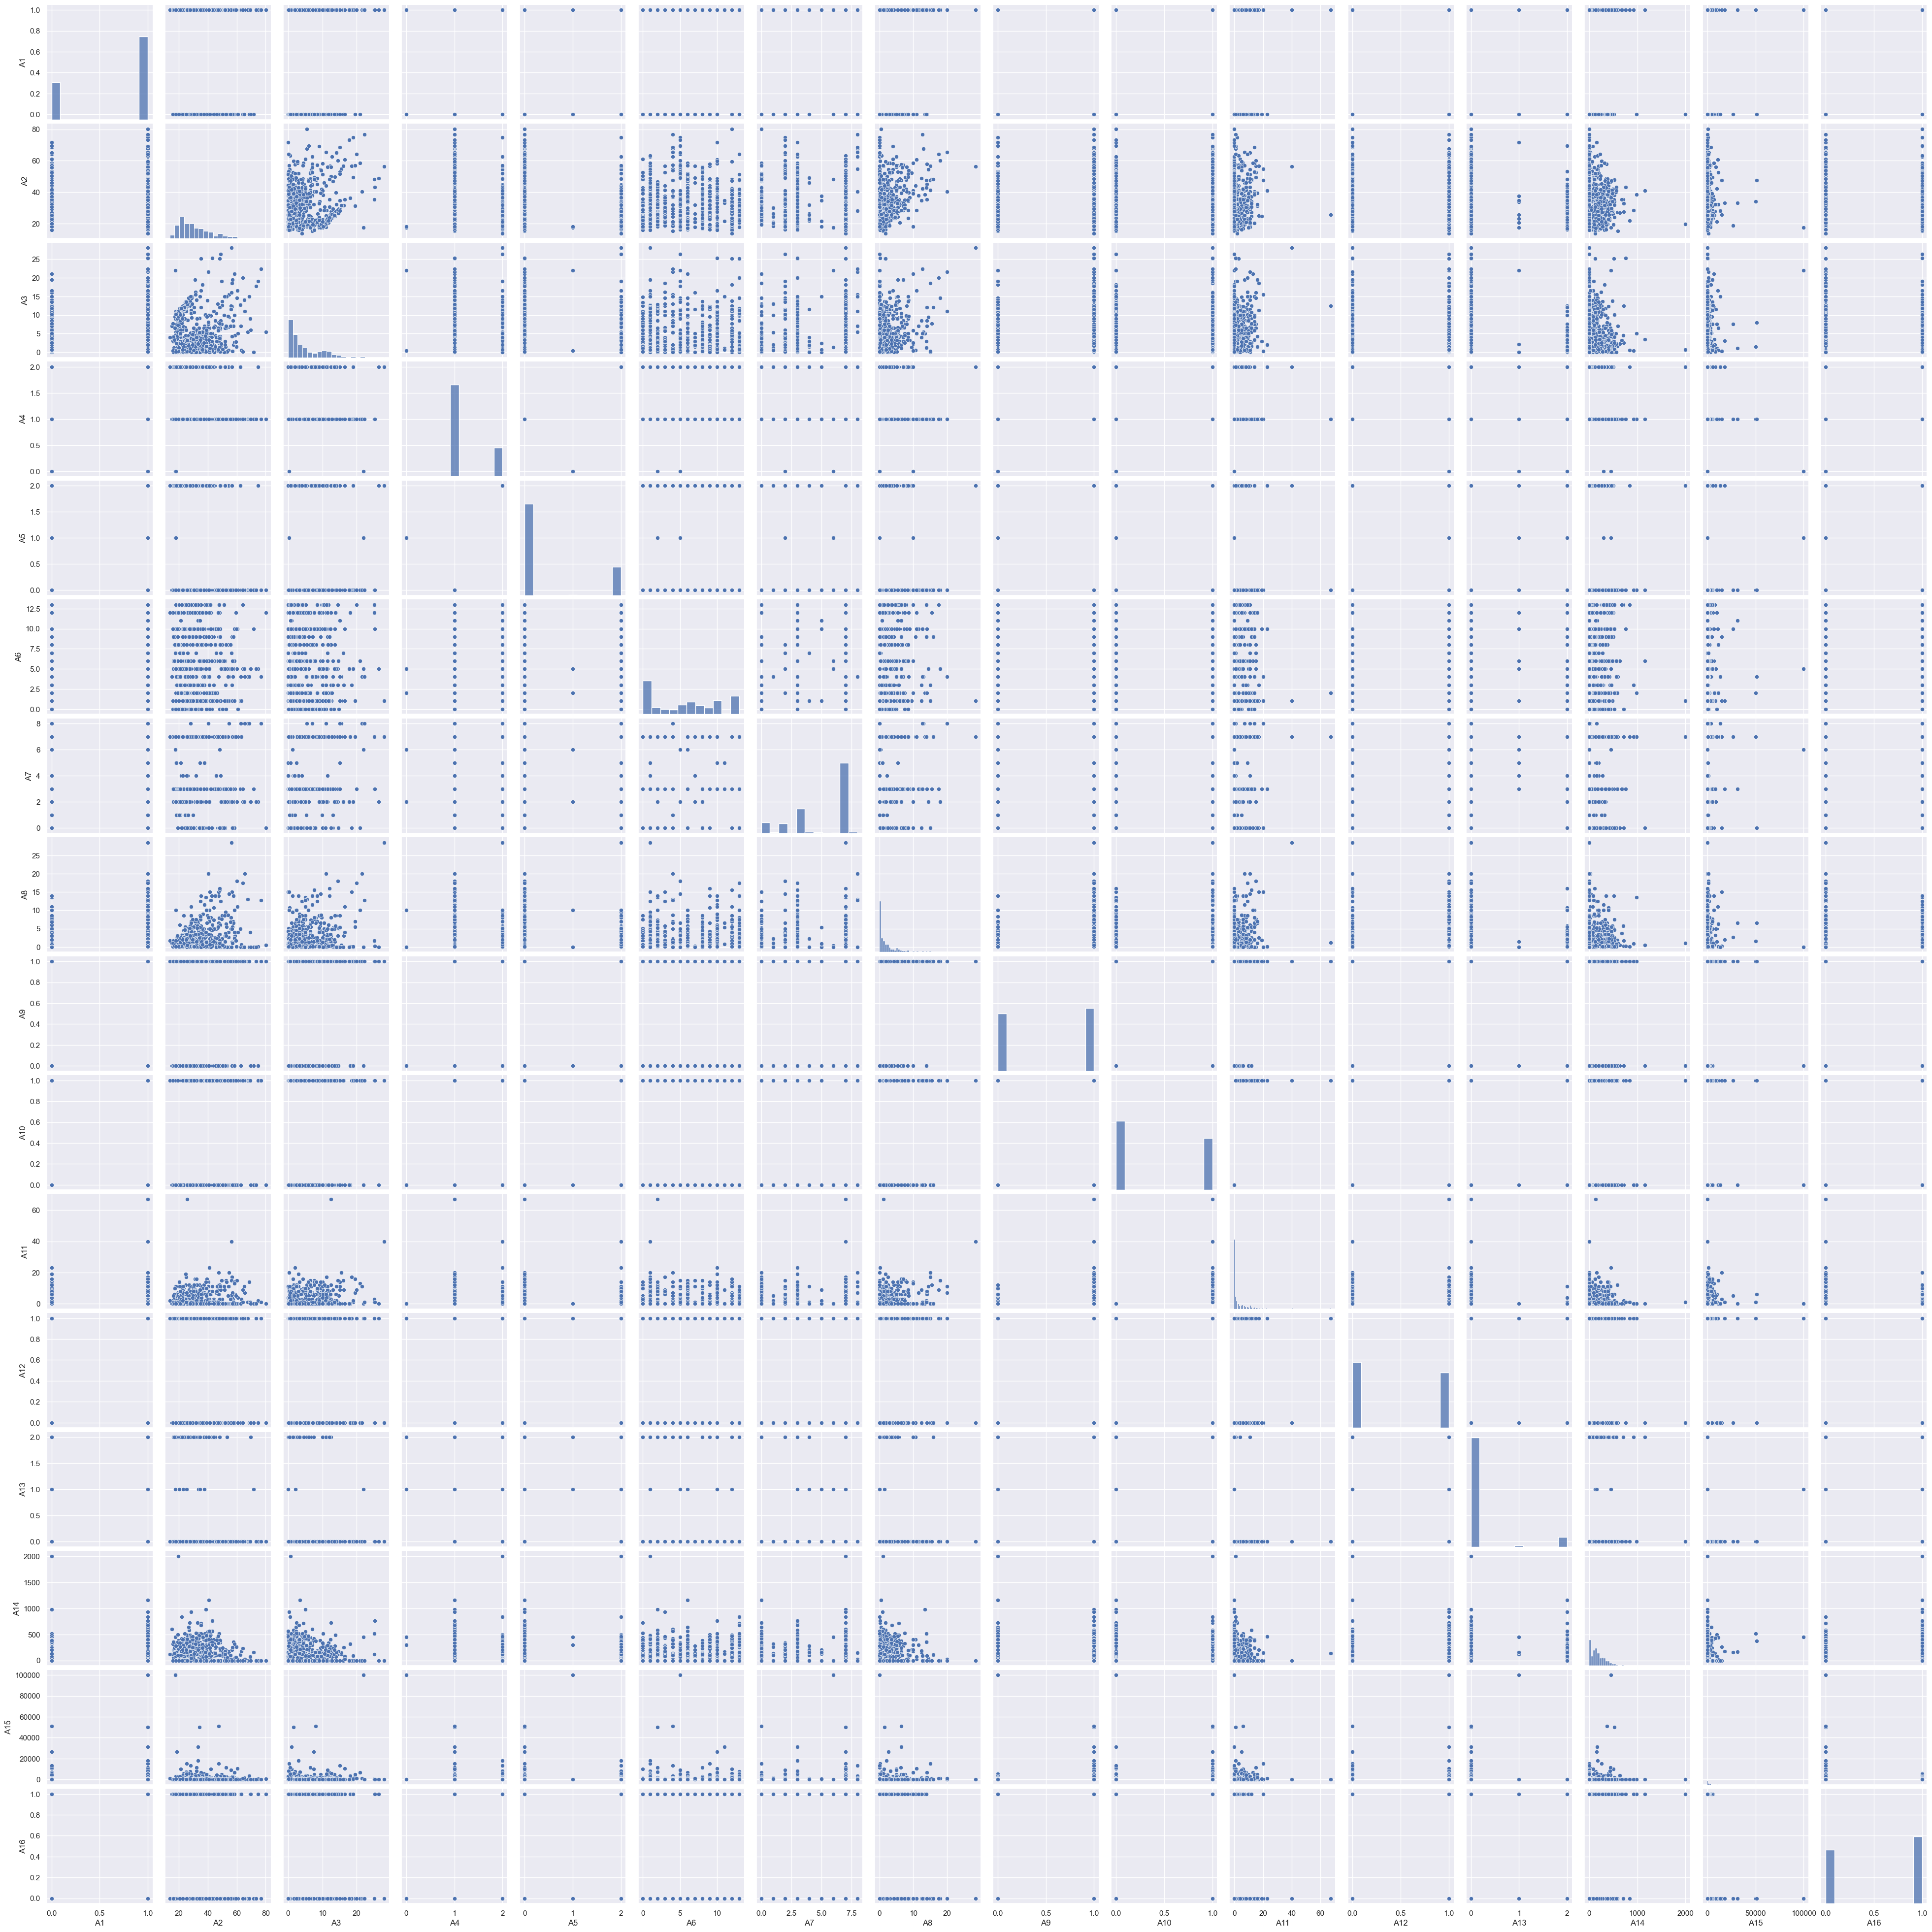

In [72]:
plt.figure(figsize=(10, 10))
sns.pairplot(ca_df)
plt.show()

### Correlation Matrix with Heatmap

- +1: Perfect positive correlation (when one variable increases, the other increases proportionally).
- 0: No correlation (no relationship between variables).
- -1: Perfect negative correlation (when one variable increases, the other decreases proportionally).

In [73]:
correlation_matrix = ca_df.corr()

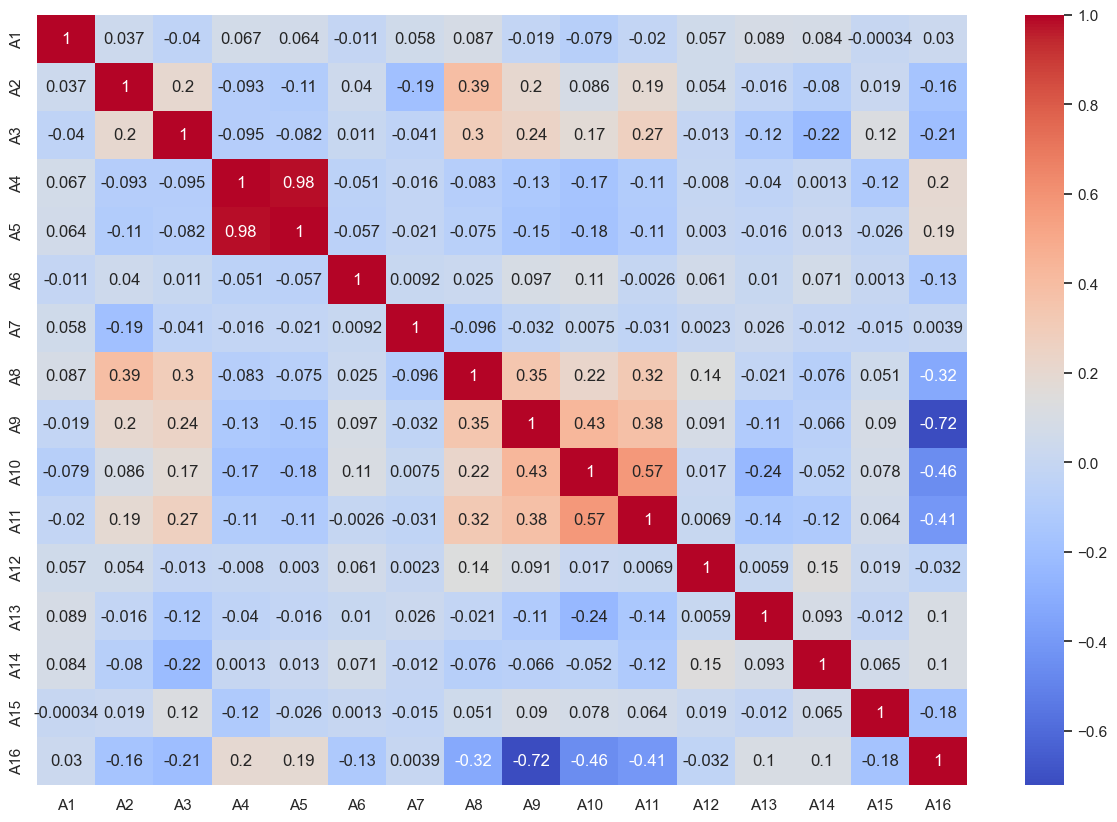

In [74]:
# use heatmap to know the correlation between x
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()

### Remove weak relationship feature 

In [75]:
# get the range of relationship need to be keep 
strong_corr = correlation_matrix[(correlation_matrix > 0.04) | (correlation_matrix < -0.04)]

# convert all weak relationship become true by using true false map
checkWeak = strong_corr.isnull()

# do filter on only get the weak relationship row
checkWeak = checkWeak[checkWeak['A16'] == True]

# view result
checkWeak

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
A1,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,True
A7,False,False,False,True,True,True,False,False,True,True,True,True,True,True,True,True
A12,False,False,True,True,True,False,True,False,False,True,True,False,True,False,True,True


In [76]:
# drop columns
ca_df = ca_df.drop(columns=checkWeak.index)

ca_df

,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15,A16
0,30.83,0.000,1.0,0.0,12.0,1.25,1.0,1.0,1,0.0,202.0,0,0.0
1,58.67,4.460,1.0,0.0,10.0,3.04,1.0,1.0,6,0.0,43.0,560,0.0
2,24.50,0.500,1.0,0.0,10.0,1.50,1.0,0.0,0,0.0,280.0,824,0.0
3,27.83,1.540,1.0,0.0,12.0,3.75,1.0,1.0,5,0.0,100.0,3,0.0
4,20.17,5.625,1.0,0.0,12.0,1.71,1.0,0.0,0,2.0,120.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,2.0,2.0,4.0,1.25,0.0,0.0,0,0.0,260.0,0,1.0
686,22.67,0.750,1.0,0.0,1.0,2.00,0.0,1.0,2,0.0,200.0,394,1.0
687,25.25,13.500,2.0,2.0,5.0,2.00,0.0,1.0,1,0.0,200.0,1,1.0
688,17.92,0.205,1.0,0.0,0.0,0.04,0.0,0.0,0,0.0,280.0,750,1.0


## Outlier Detection and Treatment

### Detecting Outlier

In [77]:
# Compute Z-scores for numerical columns
z_scores = np.abs(zscore(ca_df.select_dtypes(include=['float64', 'int64'])))

# set threshold become 3.5 due to 3 have too much of outlier 
threshold = 3.5
outliers_zscore = (z_scores > threshold)

# Output the outlier rows
outlier_indices = np.where(outliers_zscore)

print("Outlier data points based on Z-score method:")
# outlier_indices = ([row number of outlier],[??])
process_df = ca_df.iloc[outlier_indices[0]]

display(process_df)
print(f"Total Number of Row of Outlier > {process_df.index.size}")

Outlier data points based on Z-score method:


,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15,A16
6,33.17,1.040,1.0,0.0,11.0,6.500,1.0,0.0,0,0.0,164.0,31285,0.0
27,56.58,18.500,1.0,0.0,3.0,15.000,1.0,1.0,17,0.0,0.0,0,0.0
39,54.58,9.415,1.0,0.0,5.0,14.415,1.0,1.0,11,0.0,30.0,300,0.0
44,56.42,28.000,2.0,2.0,1.0,28.500,1.0,1.0,40,0.0,0.0,15,0.0
44,56.42,28.000,2.0,2.0,1.0,28.500,1.0,1.0,40,0.0,0.0,15,0.0
44,56.42,28.000,2.0,2.0,1.0,28.500,1.0,1.0,40,0.0,0.0,15,0.0
46,41.00,2.040,2.0,2.0,10.0,0.125,1.0,1.0,23,0.0,455.0,1236,0.0
65,34.17,1.540,1.0,0.0,2.0,1.540,1.0,1.0,1,0.0,520.0,50000,0.0
69,35.17,25.125,1.0,0.0,13.0,1.625,1.0,1.0,1,0.0,515.0,500,0.0
72,38.58,5.000,1.0,0.0,2.0,13.500,1.0,0.0,0,0.0,980.0,0,1.0


Total Number of Row of Outlier > 39


check dont affect the categorical data that only hava lesser value 
- A13 > p ( 1 )
- A7 > o ( 6 ), n ( 5 ), dd ( 1 ), z ( 8 ), j ( 4 ) ( drop )
- A6 > r ( 11 ), j ( 7 )
- A5 > gg ( 1 )
- A4 > l ( 0 )

In [78]:
# set list due to data already been encoded
notInclude = [["A13", [ 1 ]],
              ["A6", [11, 7]],
              ["A5", [1]],
              ["A4", [0]]]

process_df = ca_df.iloc[outlier_indices[0]]

for column, values_to_exclude in notInclude:
    # exclude rows where the column value is in the values_to_exclude list
    process_df = process_df[~process_df[column].isin(values_to_exclude)]

display(process_df)
print(f"Total Number of Row of Outlier after Update > {process_df.index.size}")

,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15,A16
27,56.58,18.500,1.0,0.0,3.0,15.000,1.0,1.0,17,0.0,0.0,0,0.0
39,54.58,9.415,1.0,0.0,5.0,14.415,1.0,1.0,11,0.0,30.0,300,0.0
44,56.42,28.000,2.0,2.0,1.0,28.500,1.0,1.0,40,0.0,0.0,15,0.0
44,56.42,28.000,2.0,2.0,1.0,28.500,1.0,1.0,40,0.0,0.0,15,0.0
44,56.42,28.000,2.0,2.0,1.0,28.500,1.0,1.0,40,0.0,0.0,15,0.0
46,41.00,2.040,2.0,2.0,10.0,0.125,1.0,1.0,23,0.0,455.0,1236,0.0
65,34.17,1.540,1.0,0.0,2.0,1.540,1.0,1.0,1,0.0,520.0,50000,0.0
69,35.17,25.125,1.0,0.0,13.0,1.625,1.0,1.0,1,0.0,515.0,500,0.0
72,38.58,5.000,1.0,0.0,2.0,13.500,1.0,0.0,0,0.0,980.0,0,1.0
86,28.46,0.375,1.0,0.0,3.0,0.875,1.0,0.0,0,2.0,928.0,0,1.0


Total Number of Row of Outlier after Update > 37


### Handling Outlier

In [79]:
# drop all 32 rows 
ca_df = ca_df.drop(index=process_df.index)

ca_df

,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15,A16
0,30.83,0.000,1.0,0.0,12.0,1.25,1.0,1.0,1,0.0,202.0,0,0.0
1,58.67,4.460,1.0,0.0,10.0,3.04,1.0,1.0,6,0.0,43.0,560,0.0
2,24.50,0.500,1.0,0.0,10.0,1.50,1.0,0.0,0,0.0,280.0,824,0.0
3,27.83,1.540,1.0,0.0,12.0,3.75,1.0,1.0,5,0.0,100.0,3,0.0
4,20.17,5.625,1.0,0.0,12.0,1.71,1.0,0.0,0,2.0,120.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,2.0,2.0,4.0,1.25,0.0,0.0,0,0.0,260.0,0,1.0
686,22.67,0.750,1.0,0.0,1.0,2.00,0.0,1.0,2,0.0,200.0,394,1.0
687,25.25,13.500,2.0,2.0,5.0,2.00,0.0,1.0,1,0.0,200.0,1,1.0
688,17.92,0.205,1.0,0.0,0.0,0.04,0.0,0.0,0,0.0,280.0,750,1.0


## Splitting Data by using Train_Test Split
- Stratified Sampling included 

In [80]:
# shuffle the A16 column data 
ca_df = shuffle(ca_df)

In [81]:
# export as csv file for further use 
ca_df.to_csv('csvDataFile/cleanData.csv', index=False) 

------------------------------------------------------------------
# Test Model start from here 

In [107]:
# read again 
clean_df = pd.read_csv('csvDataFile/cleanData.csv')

clean_df.shape

(657, 13)

In [108]:
# drop target columns
x = clean_df.drop(columns=['A16']) 
y = clean_df['A16']

In [109]:
x.head()

,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15
0,52.50,7.000,1.0,0.0,0.0,3.000,0.0,0.0,0,0.0,0.0,0
1,19.50,9.585,1.0,0.0,0.0,0.790,0.0,0.0,0,0.0,80.0,350
2,36.50,4.250,1.0,0.0,10.0,3.500,0.0,0.0,0,0.0,454.0,50
3,15.75,0.375,1.0,0.0,1.0,1.000,0.0,0.0,0,0.0,120.0,18
4,36.33,3.790,1.0,0.0,12.0,1.165,1.0,0.0,0,0.0,200.0,0


In [110]:
x = x.values

x

array([[ 52.5  ,   7.   ,   1.   , ...,   0.   ,   0.   ,   0.   ],
       [ 19.5  ,   9.585,   1.   , ...,   0.   ,  80.   , 350.   ],
       [ 36.5  ,   4.25 ,   1.   , ...,   0.   , 454.   ,  50.   ],
       ...,
       [ 27.67 ,   0.75 ,   1.   , ...,   0.   , 220.   , 251.   ],
       [ 33.67 ,   2.165,   1.   , ...,   1.   , 120.   ,   0.   ],
       [ 23.08 ,   0.   ,   1.   , ...,   2.   ,   0.   ,   0.   ]])

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.20, random_state=0)
# training using x_train and y_train

In [112]:
print(f"Size of x_train > {len(x_train)}")
print(f"Size of x_test > {len(x_test)}")

Size of x_train > 525
Size of x_test > 132


## Data Scailing by using MinMaxScaler

In [113]:
scaler = MinMaxScaler(feature_range=(0, 1))

rescaledX_train = scaler.fit_transform(x_train)
rescaledX_test = scaler.transform(x_test)

print(rescaledX_train)

[[1.19641256e-01 4.93181818e-02 5.00000000e-01 ... 0.00000000e+00
  1.50000000e-01 7.00000000e-05]
 [2.52556054e-01 7.00000000e-02 5.00000000e-01 ... 0.00000000e+00
  1.38888889e-01 3.00000000e-05]
 [4.97757848e-01 7.00000000e-02 5.00000000e-01 ... 0.00000000e+00
  3.00000000e-01 0.00000000e+00]
 ...
 [1.65919283e-01 3.40909091e-02 5.00000000e-01 ... 1.00000000e+00
  4.44444444e-01 0.00000000e+00]
 [2.64573991e-01 4.54545455e-02 5.00000000e-01 ... 0.00000000e+00
  2.31944444e-01 5.00000000e-03]
 [1.31479821e-01 4.58409091e-01 1.00000000e+00 ... 0.00000000e+00
  3.61111111e-01 0.00000000e+00]]


### Export Scaler For Future Use

In [114]:
joblib.dump(scaler, 'pklFolder/scaler.pkl')

['pklFolder/scaler.pkl']

# Modeling

In [115]:
sns.set_theme(style="white", palette=None)

## Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
import joblib

In [117]:
# create instance 
model = LogisticRegression()

# fit set into model - train
model.fit(rescaledX_train, y_train)

LogisticRegression()

In [118]:
# use test set and get the predicted result as return 
yPredTrain = model.predict(rescaledX_train)
yPredTest = model.predict(rescaledX_test)

### Check accuracy ( Score, RMSE, Confusion Matrix )

In [119]:
# display the RMSE and accuracy for both test and train 
print(f"Acurracy of Train Data > {accuracy_score(y_train, yPredTrain)}")
print(f"RMSE for Train Data    > {np.sqrt(mean_squared_error(y_train, yPredTrain))}")
print("\n")
print(f"Acurracy of Test Data  > {accuracy_score(y_test, yPredTest)}")
print(f"RMSE for Test Data     > {np.sqrt(mean_squared_error(y_test, yPredTest))}")

Acurracy of Train Data > 0.8666666666666667
RMSE for Train Data    > 0.3651483716701107


Acurracy of Test Data  > 0.8712121212121212
RMSE for Test Data     > 0.3588702812826367


<Figure size 640x480 with 0 Axes>

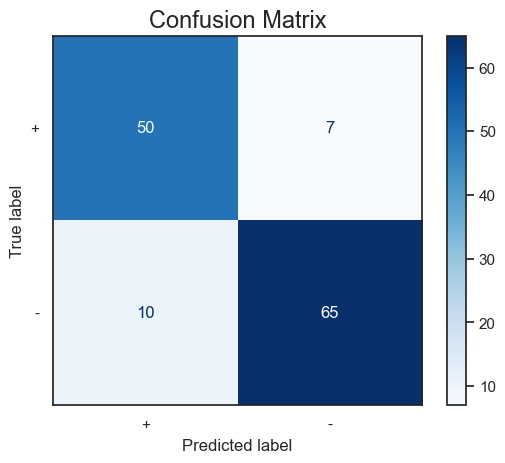

In [133]:
# show confusion matrix 
# get confusion matrix
confusionMatrix = confusion_matrix(y_test, yPredTest)

plt.figure()
diagram = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=['+', '-'])
diagram.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [121]:
print(classification_report(y_test, yPredTest))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        57
         1.0       0.90      0.87      0.88        75

    accuracy                           0.87       132
   macro avg       0.87      0.87      0.87       132
weighted avg       0.87      0.87      0.87       132



### GridSearchCV

In [122]:
# define the parameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Different values for the regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Different types of penalties
    'solver': ['saga', 'newton-cg', 'liblinear', 'sag', 'lbfgs'],  
    'max_iter': [100, 150, 200, 500, 1000], 
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
    'tol' : [0.01, 0.001, 0.0001]
}

# liblinear suitable for small but sag and saga is suitable for largest and more faster 
# but for liblinear is not suitable for multiclass problem, only have newton-cg, lbfgs(default), sag and saga suitable for this case 

In [123]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1)
# cv = 5 > 5-fold cross-validation
# verbose = 1 > show progress
# n_jobs = -1 > use all available cores

In [124]:
# fit in the data to find best comparision
grid_model_result = grid_search.fit(rescaledX_train, y_train)

C:\Users\LENOVO\anaconda3\envs\creditApproval\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
36000 fits failed out of a total of 60000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\envs\creditApproval\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\envs\creditApproval\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\envs\creditApp

In [125]:
# display the best parameter
print(f"Best C        > {grid_model_result.best_estimator_.C}")
print(f"Best penalty  > {grid_model_result.best_estimator_.penalty}")
print(f"Best solver   > {grid_model_result.best_estimator_.solver}")
print(f"Best max_iter > {grid_model_result.best_estimator_.max_iter}")
print(f"Best l1_ratio > {grid_model_result.best_estimator_.l1_ratio}")
print(f"Best tol      > {grid_model_result.best_estimator_.tol}")

print(f"The best score get from grid > {grid_model_result.best_score_}")

Best C        > 1000
Best penalty  > l2
Best solver   > lbfgs
Best max_iter > 100
Best l1_ratio > 0
Best tol      > 0.0001
The best score get from grid > 0.8647619047619047


In [126]:
# show testing performance 
yGridPredTrain = grid_model_result.predict(rescaledX_train)
yGridPredTest = grid_model_result.predict(rescaledX_test)

In [127]:
# display the RMSE and accuracy for both test and train 
print(f"Acurracy of Train Data after Grid > {accuracy_score(y_train, yGridPredTrain)}")
print(f"RMSE for Train Data after Grid    > {np.sqrt(mean_squared_error(y_train, yPredTrain))}")
print("\n")
print(f"Acurracy of Test Data after Grid  > {accuracy_score(y_test, yGridPredTest)}")
print(f"RMSE for Test Data after Grid     > {np.sqrt(mean_squared_error(y_test, yGridPredTest))}")

Acurracy of Train Data after Grid > 0.8742857142857143
RMSE for Train Data after Grid    > 0.3651483716701107


Acurracy of Test Data after Grid  > 0.8712121212121212
RMSE for Test Data after Grid     > 0.3588702812826367


<Figure size 640x480 with 0 Axes>

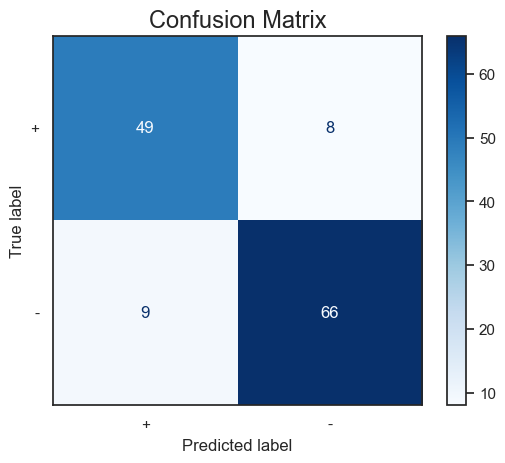

In [134]:
# show confusion matrix 
# get confusion matrix
confusionMatrix = confusion_matrix(y_test, yGridPredTest)

plt.figure()
diagram = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=['+', '-'])
diagram.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [129]:
print(classification_report(y_test, yGridPredTest))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85        57
         1.0       0.89      0.88      0.89        75

    accuracy                           0.87       132
   macro avg       0.87      0.87      0.87       132
weighted avg       0.87      0.87      0.87       132



### Export For Further Use

In [143]:
joblib.dump(grid_model_result, 'pklFolder/model/LogisticRegression.pkl')

['pklFolder/model/LogisticRegression.pkl']

-----------------------------------------------------
Evaluation Start 

# Model Performance Comparision

In [144]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [145]:
def print_scores(y, y_pred):
    ac, pr, rc, f1 = accuracy_score(y, y_pred)*100, precision_score(y, y_pred)*100, recall_score(y, y_pred)*100, f1_score(y, y_pred)*100
    
    return {'ac': ac, 'pr': pr, 'rc': rc, 'f1': f1} # get all accurancy, precision, recall and f1 

In [147]:
# read and predict all model to get the y 
# LogisticRegression.pkl
logReg_model = joblib.load('pklFolder/model/LogisticRegression.pkl')

# svc_classifier.pkl
svc_model = joblib.load('pklFolder/model/svc_classifier.pkl')

# RandomForestClassifier.pkl
rfc_model = joblib.load('pklFolder/model/RandomForestClassifier.pkl')

# knn.pkl
knn_model = joblib.load('pklFolder/model/knn.pkl')

# xgboost.pkl 
xgb_model = joblib.load('pklFolder/model/xgboost.pkl')

modelList = [logReg_model, svc_model, rfc_model, knn_model, xgb_model]

In [148]:
modelCompare = {
    'Model': ['LogisticRegression', 'Support Vector Classification', 'Random Forest Classifaction', 'K Nearest Neighbourhood', 'XGBOOST Classification'],
    'Accuracy': [ ],
    'Precision': [ ],
    'Recall': [ ],
    'F1 Score': [ ]
}

In [ ]:
# use testing dataset rescaledX_test, y_test
predict_y = logReg_model.predict(rescaledX_test)
score = print_scores(y_test, predict_y)

for model in modelList : 
    predict_y = model.predict(rescaledX_test)
    
    score = print_scores(y_test, predict_y)

    modelCompare['Accuracy'].append(predict_y['ac'])
    modelCompare['Precision'].append(predict_y['pr'])
    modelCompare['Recall'].append(predict_y['rc'])
    modelCompare['F1 Score'].append(predict_y['f1'])


results_df = pd.DataFrame(model_compare)
results_df

## Comparing Actual and Predicted 

In [178]:
# search for a data 
clean_df.loc[30]

dataTest = clean_df.drop(columns=['A16']).loc[30].values
y = clean_df['A16'].loc[30]

print(f"X feature > {dataTest}")
print(f"Y predict > {y}")

X feature > [ 26.25    1.54    1.      0.     12.      0.125   0.      0.      0.
   0.    100.      0.   ]
Y predict > 1.0


In [168]:
# logReg_model.predict([dataTest])

array([1.])

In [179]:
for i in range(len(modelList)) : 
    # loop the modelList
    result = modelList[i].predict([dataTest])

    print(f"{modelCompare['Model'][i]} > {result} ( {'false' if result != y else 'true'} )")

LogisticRegression > [1.] ( true )


# Testing for UI

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Example DataFrame
# data = dict( A2=[30.83], 
#              A3=[0.000],  
#              A4=['u'], 
#              A5=['g'], 
#              A6=['w'],
#              A8=[1.250],
#              A9=['t'],
#              A10=['t'],
#              A11=[1],
#              A13=['g'],
#              A14=[202.0],
#              A15=[0]
#            )

data = {
        'A2' : 30.83,
        'A3' : 0.000,
        'A4' : 'u',
        'A5' : 'g',
        'A6' : 'w',
        'A8' : 1.250,
        'A9' : 't',
        'A10' : 't',
        'A11' : 1,
        'A13' : 'g',
        'A14' : 202.0,
        'A15' : 0
    }
# y = + (0)

df = pd.DataFrame([data])

df

,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15
0,30.83,0.0,u,g,w,1.25,t,t,1,g,202.0,0


In [21]:
encoder = joblib.load('pklFolder/encoder.pkl')
scaler = joblib.load('pklFolder/scaler.pkl')
model = joblib.load('pklFolder/model/LogisticRegression.pkl')

In [30]:
categorical_columns = ['A4', 'A5', 'A6', 'A9', 'A10', 'A13']

df[categorical_columns] = encoder.transform(df[categorical_columns])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- A10
- A13
- A4
- A5
- A6
- ...
Feature names seen at fit time, yet now missing:
- A16


In [ ]:
# Create a ColumnTransformer to handle different transformations for different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, ['A4', 'A5', 'A6', 'A9', 'A10', 'A13']),  # Apply OrdinalEncoder to categorical columns
        ('num', scaler, ['A2', 'A3', 'A8', 'A11', 'A14', 'A15'])  # Apply StandardScaler to numerical columns
    ])

# Fit and transform the entire DataFrame
df_transformed = preprocessor.transform(df)

display(df_transformed)

# Convert the result back to a DataFrame (optional, for better readability)
df_transformed = pd.DataFrame(df_transformed, columns=['A2', 'A3', 'A4', 'A5', 'A6', 'A8', 'A9', 'A10', 'A11', 'A13', 'A14', 'A15'])

# Print the transformed DataFrame
print(df_transformed)